# Monolitic Machine Learning Pipeline using Gradio

In [32]:
from pathlib import Path
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, root_mean_squared_error, r2_score

sys.path.insert(0, str(Path().resolve().parent / "src"))

from paths import  TRANSFORMED_DATA_DIR



## Load Dataset

In [21]:
# dataframe
df = pd.read_csv(f"{TRANSFORMED_DATA_DIR}/weather_20200101_to_20250201.csv")
df.head()

,row_id,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,timestamp,date,time,aqi_bucket
0,0,5,1682.28,0.13,18.85,12.88,8.82,64.62,90.85,17.48,2020-11-25 01:00:00,2020-11-25,01:00:00,Very Poor
1,1,5,2109.53,0.36,21.94,9.30,10.37,93.95,127.43,21.03,2020-11-25 02:00:00,2020-11-25,02:00:00,Very Poor
2,2,5,2750.40,1.41,26.39,4.16,12.52,136.28,181.39,25.59,2020-11-25 03:00:00,2020-11-25,03:00:00,Very Poor
3,3,5,3337.86,4.81,28.45,0.78,14.07,175.09,233.20,28.63,2020-11-25 04:00:00,2020-11-25,04:00:00,Very Poor
4,4,5,3738.40,10.95,28.45,0.10,15.26,200.27,262.51,30.91,2020-11-25 05:00:00,2020-11-25,05:00:00,Very Poor


## Feature Selection

In [22]:
# Feature Selection: The various pollutant indices co, no, no2, o3, so2, pm2_5, pm10, and nh3 are used for AQI calculation
df = df[["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3", "aqi_bucket"]]
df.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi_bucket
0,1682.28,0.13,18.85,12.88,8.82,64.62,90.85,17.48,Very Poor
1,2109.53,0.36,21.94,9.30,10.37,93.95,127.43,21.03,Very Poor
2,2750.40,1.41,26.39,4.16,12.52,136.28,181.39,25.59,Very Poor
3,3337.86,4.81,28.45,0.78,14.07,175.09,233.20,28.63,Very Poor
4,3738.40,10.95,28.45,0.10,15.26,200.27,262.51,30.91,Very Poor


In [23]:
# split dataset to features and labels
features = df[["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3"]]
labels = df["aqi_bucket"]

In [24]:
features.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,1682.28,0.13,18.85,12.88,8.82,64.62,90.85,17.48
1,2109.53,0.36,21.94,9.30,10.37,93.95,127.43,21.03
2,2750.40,1.41,26.39,4.16,12.52,136.28,181.39,25.59
3,3337.86,4.81,28.45,0.78,14.07,175.09,233.20,28.63
4,3738.40,10.95,28.45,0.10,15.26,200.27,262.51,30.91


In [25]:
labels.head()

0    Very Poor
1    Very Poor
2    Very Poor
3    Very Poor
4    Very Poor
Name: aqi_bucket, dtype: object

## Train Test Split

In [26]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

## Feature Scaling

In [27]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building Machine Learning Model

LightGBM, Random Forest, Catboost, Adaboost, and XGBoost. , SVM, and LSTM

## Logistic

In [29]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

/Users/macbook/Desktop/horlarDEV/Air_MLOPs/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred = log_model.predict(X_test)
y_pred

/Users/macbook/Desktop/horlarDEV/Air_MLOPs/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array(['Very Poor', 'Very Poor', 'Very Poor', ..., 'Very Poor',
       'Very Poor', 'Very Poor'], dtype=object)

In [31]:
accuracy_score = accuracy_score(y_test, y_pred)
print(accuracy_score)

0.6352746798843453


### KNN

In [14]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

In [15]:
y_pred = model.predict(X_test)
y_pred

array(['Very Poor', 'Very Poor', 'Moderate', ..., 'Poor', 'Very Poor',
       'Very Poor'], dtype=object)

In [27]:
accuracy_score = accuracy_score(y_test, y_pred)
print(accuracy_score)

0.7995318738813163


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

        Fair       0.72      0.90      0.80       417
        Good       1.00      1.00      1.00         2
    Moderate       0.48      0.66      0.55       864
        Poor       0.54      0.49      0.52      1366
   Very Poor       0.97      0.91      0.94      4614

    accuracy                           0.80      7263
   macro avg       0.74      0.79      0.76      7263
weighted avg       0.82      0.80      0.81      7263



In [20]:
results = confusion_matrix(y_test, y_pred)
print(results)

[[ 376    0   41    0    0]
 [   0    2    0    0    0]
 [ 129    0  570  160    5]
 [  16    0  561  675  114]
 [   0    0   20  410 4184]]


<Axes: >

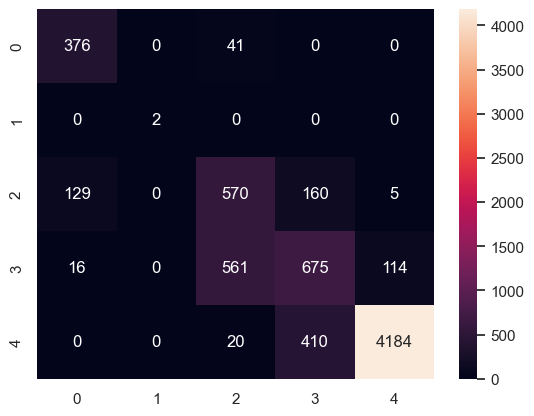

In [26]:
sns.heatmap(results, annot=True, fmt=".0f")

In [38]:
import gradio as gr
import numpy as np

In [52]:
def air_prediction(co, no, no2, o3, so2, pm2_5, pm10, nh3):
    # Ensure all values are numeric
    input_list = [float(co), float(no), float(no2), float(o3), 
                  float(so2), float(pm2_5), float(pm10), float(nh3)]
    
    print("Processed Input List:", input_list)
    
    # Convert to NumPy array and reshape correctly
    input_array = np.array(input_list).reshape(1, -1)  # Reshape to (1, 8)
    
    res = model.predict(input_array)  # Assuming 'model' is already defined and trained
    return res[0]

In [ ]:
demo = gr.Interface(
    fn=air_prediction,
    outputs="textbox",
    title="Air Quality Index Predictor",
    description="Experimenting",
    # allow_flagging="never",
    inputs=[
        gr.Textbox(label="Carbon Monoxide (CO) concentration in µg/m³."),
        gr.Textbox(label="Nitric Oxide (NO) concentration in µg/m³."),
        gr.Textbox(label="Nitrogen Dioxide (NO₂) concentration in µg/m³."),
        gr.Textbox(label="Ozone (O₃) concentration in µg/m³."),
        gr.Textbox(label="Sulfur Dioxide (SO₂) concentration in µg/m³."),
        gr.Textbox(label="Fine Particulate Matter (PM2.5) concentration in µg/m³."),
        gr.Textbox(label="Coarse Particulate Matter (PM10) concentration in µg/m³."),
        gr.Textbox(label="Ammonia (NH₃) concentration in µg/m³.")
    ],
    # outputs=gr.Label()
)

demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7866
2025-03-09 02:49:39,350 INFO: HTTP Request: GET http://127.0.0.1:7866/gradio_api/startup-events "HTTP/1.1 200 OK"
2025-03-09 02:49:39,365 INFO: HTTP Request: HEAD http://127.0.0.1:7866/ "HTTP/1.1 200 OK"
2025-03-09 02:49:40,434 INFO: HTTP Request: GET https://api.gradio.app/pkg-version "HTTP/1.1 200 OK"
2025-03-09 02:49:40,872 INFO: HTTP Request: GET https://api.gradio.app/v3/tunnel-request "HTTP/1.1 200 OK"
* Running on public URL: https://15b615605e9423858e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
2025-03-09 02:49:44,256 INFO: HTTP Request: HEAD https://15b615605e9423858e.gradio.live "HTTP/1.1 200 OK"


Processed Input List: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


Processed Input List: [1682.28, 0.13, 18.85, 12.88, 8.82, 64.62, 90.85, 17.48]


Created dataset file at: .gradio/flagged/dataset1.csv
